time/neighborhood -> call type

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dat = pd.read_csv('dat/911_Police_Calls_for_Service.csv', low_memory=False)

In [3]:
# reduce overhead while messing with data
dat = dat.head(1000)

dat.head()

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,2333660,P163072128,11/02/2016 04:46:00 PM,Medium,SD,NARCOTICSOutside,1200 W CROSS ST,21230.0,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2102,NaN,"1200 W CROSS ST\nBALTIMORE, MD\n(39.281995, -7...",250.0,177.0,27953.0
1,2334887,P163070732,11/02/2016 09:22:00 AM,High,SW,Traffic Stop,2100 W PRATT ST,21223.0,Carrollton Ridge,Southwestern,841.0,9.0,D8,Southwest Baltimore,Census Tract 2005,Tri-District,"2100 W PRATT ST\nBALTIMORE, MD\n(39.284965, -7...",36.0,279.0,27632.0
2,2334245,P163071480,11/02/2016 01:37:00 PM,Low,SE,LARCENY F/AUTO,HOME DEPOT,21224.0,Pulaski Industrial Area,Southeastern,242.0,1.0,D6,Orangeville/East Highlandtown,Census Tract 2605.01,NaN,"HOME DEPOT BALTIMORE, MD\n(39.499699, -76.641403)",NaN,NaN,3490.0
3,2332907,P163072974,11/02/2016 08:20:00 PM,Medium,ND,911/NO VOICE,5200 YORK RD,21212.0,York-Homeland,Northern,521.0,4.0,D2,North Baltimore/Guilford/Homeland,Census Tract 2711.01,NaN,"5200 YORK RD\nBALTIMORE, MD\n(39.352315, -76.6...",273.0,217.0,14009.0
4,2332699,P163073203,11/02/2016 09:39:00 PM,Medium,NW,COMMON ASSAULT,2500 N ELLAMONT ST,21216.0,Hanlon-Longwood,Northwestern,641.0,7.0,D9,Greater Mondawmin,Census Tract 1507.01,NaN,"2500 N ELLAMONT ST\nBALTIMORE, MD\n(39.315441,...",103.0,46.0,27297.0


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RecordID                     1000 non-null   int64  
 1   CallNumber                   1000 non-null   object 
 2   CallDateTime                 1000 non-null   object 
 3   Priority                     1000 non-null   object 
 4   District                     1000 non-null   object 
 5   Description                  1000 non-null   object 
 6   IncidentLocation             1000 non-null   object 
 7   ZipCode                      994 non-null    float64
 8   Neighborhood                 995 non-null    object 
 9   PoliceDistrict               996 non-null    object 
 10  PolicePost                   996 non-null    float64
 11  CouncilDistrict              996 non-null    float64
 12  SheriffDistricts             996 non-null    object 
 13  Community_Statistic

In [5]:
# Add a column for time and insert data
time = dat['CallDateTime']
times = time.str[11:13]
periods = time.str[20:22]

#pd.get_dummies(periods)

In [6]:
dat.insert(3, "Hour", times, True)

In [7]:
periods = pd.get_dummies(periods)
dat.insert(4, "AM", periods['AM'], True)
dat.insert(5, "PM", periods['PM'], True)

In [18]:
# Convert priority into categorical data
from pandas.api.types import CategoricalDtype

priority_cats = CategoricalDtype(categories=['Non-Emergency', 'Low', 'Medium',  'High'], ordered=True)
dat['Priority'] = dat['Priority'].astype(priority_cats)

dat['Priority']

0             Medium
1               High
2                Low
3             Medium
4             Medium
           ...      
995    Non-Emergency
996           Medium
997             High
998              Low
999              Low
Name: Priority, Length: 1000, dtype: category
Categories (4, object): [Non-Emergency < Low < Medium < High]

In [19]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   RecordID                     1000 non-null   int64   
 1   CallNumber                   1000 non-null   object  
 2   CallDateTime                 1000 non-null   object  
 3   Hour                         1000 non-null   object  
 4   AM                           1000 non-null   uint8   
 5   PM                           1000 non-null   uint8   
 6   Priority                     1000 non-null   category
 7   District                     1000 non-null   object  
 8   Description                  1000 non-null   object  
 9   IncidentLocation             1000 non-null   object  
 10  ZipCode                      994 non-null    float64 
 11  Neighborhood                 995 non-null    object  
 12  PoliceDistrict               996 non-null    object  
 13  Poli

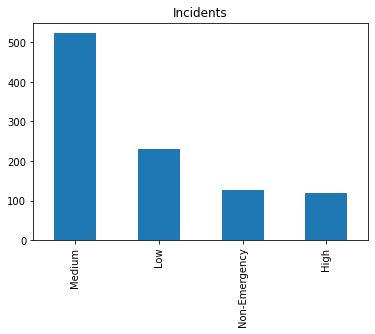

In [35]:
pcount = dat['Priority'].value_counts()

fig = plt.figure(figsize=(6,4))
pcount.plot(kind='bar')

plt.title('Incidents')
#plt.ylabel('Number')
plt.show()